In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import zscore
from sklearn.preprocessing  import power_transform, StandardScaler, LabelEncoder
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score, plot_roc_curve, r2_score, classification_report, mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

import pickle

In [2]:
df=pd.read_csv("Flight_data.csv")

## EDA

In [4]:
df

,Unnamed: 0,Airline,Destination,Source,Arrival_time,Departure_time,Total_Stops,Total_Duration,Additional_Info,Price
0,0,Go First,Chennai,New Delhi,22:30,07:35\n+ 1 day,1 Stop,9h 05m,Free Meal,"6,417"
1,1,Go First,Chennai,New Delhi,21:00,07:35\n+ 1 day,1 Stop,10h 35m,Free Meal,"6,417"
2,2,Go First,Chennai,New Delhi,20:00,07:35\n+ 1 day,1 Stop,11h 35m,Free Meal,"6,417"
3,3,Go First,Chennai,New Delhi,18:00,07:35\n+ 1 day,1 Stop,13h 35m,Free Meal,"6,417"
4,4,SpiceJet,Chennai,New Delhi,18:50,21:30,Non Stop,2h 40m,Free Meal,"6,610"
...,...,...,...,...,...,...,...,...,...,...
1016,1016,Vistara,Kolkata,Bangalore,21:35,16:50\n+ 1 day,1 Stop,19h 15m,NaN,"20,526"
1017,1017,IndiGo,Kolkata,Bangalore,11:50,20:45,1 Stop,8h 55m,NaN,"21,007"
1018,1018,Vistara,Kolkata,Bangalore,21:35,09:40\n+ 1 day,1 Stop,12h 05m,NaN,"22,311"
1019,1019,Vistara,Kolkata,Bangalore,20:30,18:05\n+ 1 day,2 Stop(s),21h 35m,NaN,"29,314"


In [16]:
df['Price']=df['Price'].str.replace(',','')

In [17]:
df

,Unnamed: 0,Airline,Destination,Source,Arrival_time,Departure_time,Total_Stops,Total_Duration,Additional_Info,Price
0,0,Go First,Chennai,New Delhi,22:30,07:35\n+ 1 day,1 Stop,9h 05m,Free Meal,6417
1,1,Go First,Chennai,New Delhi,21:00,07:35\n+ 1 day,1 Stop,10h 35m,Free Meal,6417
2,2,Go First,Chennai,New Delhi,20:00,07:35\n+ 1 day,1 Stop,11h 35m,Free Meal,6417
3,3,Go First,Chennai,New Delhi,18:00,07:35\n+ 1 day,1 Stop,13h 35m,Free Meal,6417
4,4,SpiceJet,Chennai,New Delhi,18:50,21:30,Non Stop,2h 40m,Free Meal,6610
...,...,...,...,...,...,...,...,...,...,...
1016,1016,Vistara,Kolkata,Bangalore,21:35,16:50\n+ 1 day,1 Stop,19h 15m,NaN,20526
1017,1017,IndiGo,Kolkata,Bangalore,11:50,20:45,1 Stop,8h 55m,NaN,21007
1018,1018,Vistara,Kolkata,Bangalore,21:35,09:40\n+ 1 day,1 Stop,12h 05m,NaN,22311
1019,1019,Vistara,Kolkata,Bangalore,20:30,18:05\n+ 1 day,2 Stop(s),21h 35m,NaN,29314


#### Checking Total Numbers of Rows and Column

In [8]:
df.shape

(1021, 10)

#### Checking All Column Name

In [9]:
df.columns

Index(['Unnamed: 0', 'Airline', 'Destination', 'Source', 'Arrival_time',
       'Departure_time', 'Total_Stops', 'Total_Duration', 'Additional_Info',
       'Price'],
      dtype='object')

#### Checking Data Type of All Data

In [10]:
df.dtypes

Unnamed: 0          int64
Airline            object
Destination        object
Source             object
Arrival_time       object
Departure_time     object
Total_Stops        object
Total_Duration     object
Additional_Info    object
Price              object
dtype: object

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021 entries, 0 to 1020
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       1021 non-null   int64 
 1   Airline          1021 non-null   object
 2   Destination      1021 non-null   object
 3   Source           1021 non-null   object
 4   Arrival_time     1021 non-null   object
 5   Departure_time   1021 non-null   object
 6   Total_Stops      1021 non-null   object
 7   Total_Duration   1021 non-null   object
 8   Additional_Info  622 non-null    object
 9   Price            1021 non-null   object
dtypes: int64(1), object(9)
memory usage: 79.9+ KB


#### Checking for Null Values

In [11]:
df.isnull()

,Unnamed: 0,Airline,Destination,Source,Arrival_time,Departure_time,Total_Stops,Total_Duration,Additional_Info,Price
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1016,False,False,False,False,False,False,False,False,True,False
1017,False,False,False,False,False,False,False,False,True,False
1018,False,False,False,False,False,False,False,False,True,False
1019,False,False,False,False,False,False,False,False,True,False


In [12]:
df.isnull().sum()

Unnamed: 0           0
Airline              0
Destination          0
Source               0
Arrival_time         0
Departure_time       0
Total_Stops          0
Total_Duration       0
Additional_Info    399
Price                0
dtype: int64

#### Checking for Null Values through heatmap

<AxesSubplot:>

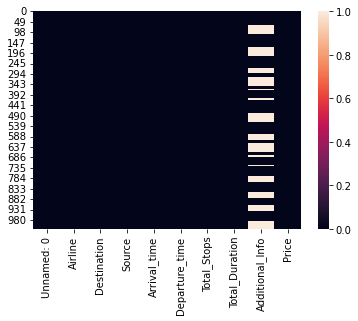

In [14]:
sns.heatmap(df.isnull())

In [19]:
df['Additional_Info'].fillna(df['Additional_Info'].mode()[0], inplace=True)

<AxesSubplot:>

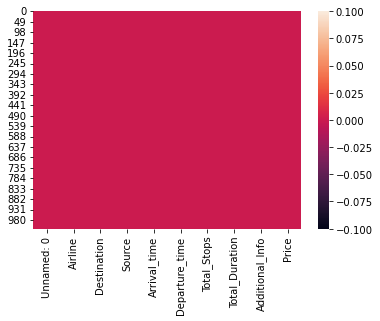

In [21]:
sns.heatmap(df.isnull())

#### We have handled the missing value.

In [22]:
# Checking the unique values.
df.nunique()

Unnamed: 0         1021
Airline               7
Destination           5
Source                4
Arrival_time        121
Departure_time      163
Total_Stops           3
Total_Duration      239
Additional_Info       2
Price               298
dtype: int64

#### Almost all column contains unique values.

In [23]:
# We will remove the 'unnamed column' as it is irrelevent and only contain unique values.
df.drop('Unnamed: 0',axis=1,inplace=True)

In [25]:
# Checking the dataset columns.
df.columns

Index(['Airline', 'Destination', 'Source', 'Arrival_time', 'Departure_time',
       'Total_Stops', 'Total_Duration', 'Additional_Info', 'Price'],
      dtype='object')

In [26]:
#Checking again "-" values in column 'Date_of_Journey' after droping
(df=='-').sum()

Airline            0
Destination        0
Source             0
Arrival_time       0
Departure_time     0
Total_Stops        0
Total_Duration     0
Additional_Info    0
Price              0
dtype: int64

In [27]:
#Checking again "Null" values in dataset
df.isnull().sum()

Airline            0
Destination        0
Source             0
Arrival_time       0
Departure_time     0
Total_Stops        0
Total_Duration     0
Additional_Info    0
Price              0
dtype: int64

## Univariate data analysis

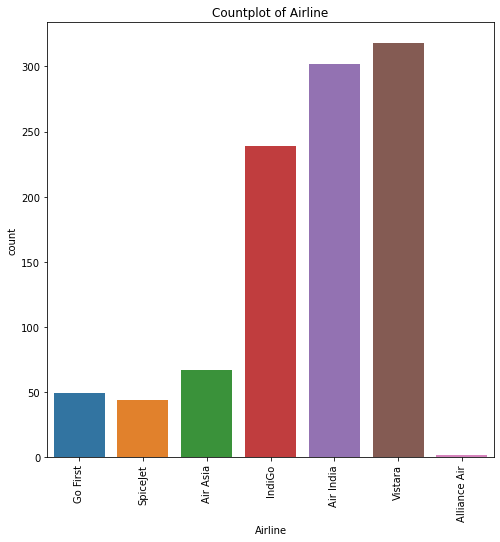

Vistara         318
Air India       302
IndiGo          239
Air Asia         67
Go First         49
SpiceJet         44
Alliance Air      2
Name: Airline, dtype: int64

In [29]:
# Visualizing the Airline column using countplot.

plt.subplots(figsize=(8,8))
sns.countplot(x='Airline', data=df)
plt.title("Countplot of Airline")
plt.xticks(rotation=90)
plt.xlabel('Airline')
plt.ylabel("count")
plt.show()

df['Airline'].value_counts()

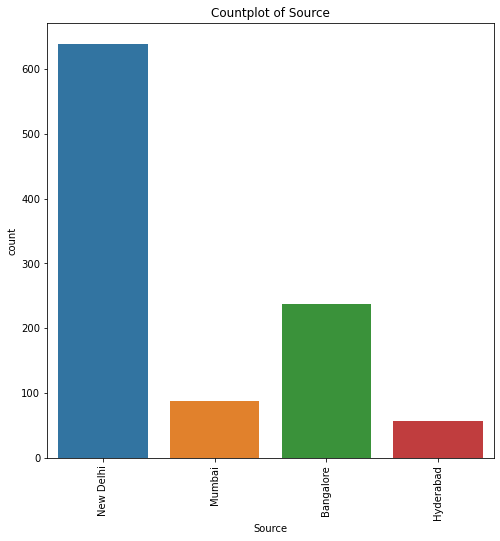

New Delhi    639
Bangalore    237
Mumbai        88
Hyderabad     57
Name: Source, dtype: int64

In [30]:
# Visualizing Source column using countplot.

plt.subplots(figsize=(8,8))
sns.countplot(x='Source', data=df)
plt.title("Countplot of Source")
plt.xticks(rotation=90)
plt.xlabel('Source')
plt.ylabel("count")
plt.show()

df['Source'].value_counts()

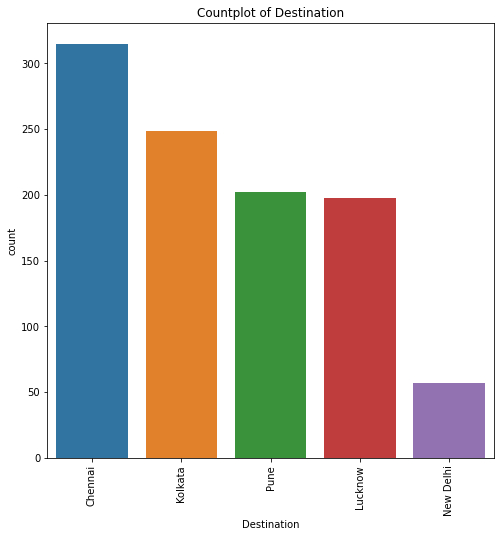

New Delhi    639
Bangalore    237
Mumbai        88
Hyderabad     57
Name: Source, dtype: int64

In [31]:
# Visualizing Destination column using countplot.

plt.subplots(figsize=(8,8))
sns.countplot(x='Destination', data=df)
plt.title("Countplot of Destination")
plt.xticks(rotation=90)
plt.xlabel('Destination')
plt.ylabel("count")
plt.show()

df['Source'].value_counts()

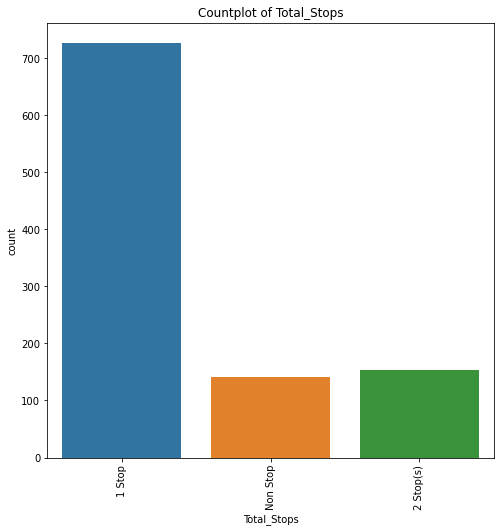

1 Stop       726
2 Stop(s)    154
Non Stop     141
Name: Total_Stops, dtype: int64

In [32]:
# Visualizing Total_Stops column using countplot.

plt.subplots(figsize=(8,8))
sns.countplot(x='Total_Stops', data=df)
plt.title("Countplot of Total_Stops")
plt.xticks(rotation=90)
plt.xlabel('Total_Stops')
plt.ylabel("count")
plt.show()

df['Total_Stops'].value_counts()

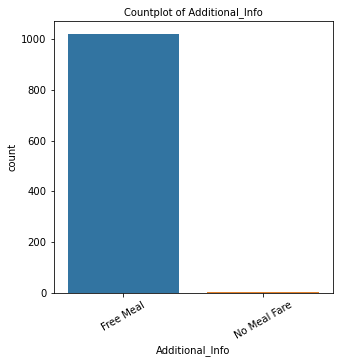

Free Meal       1019
No Meal Fare       2
Name: Additional_Info, dtype: int64


In [33]:
# Visualizing Addional_Info column using countplot.

plt.figure(figsize = (5,5))
ax=sns.countplot(x="Additional_Info", data=df) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.title("Countplot of Additional_Info", fontsize = 10)
plt.show()
print(df['Additional_Info'].value_counts())

## Observations of Univariate Analysis
#### 1.Most of the Airline that flies belongs to Vistara and very less are of Alliance air.

#### 2.Most of the flights took off from New Delhi and Chennai and very less from Kolkata.

#### 3.Most of the flights reached to Goa and kolkata and very less to Pune.

#### 4.Most of the flights only take 1 stop and very less 3 stops.

In [34]:
# Replacing String to numeric for better prediction.

df.replace({"Non Stop": 0, 
                      "1 Stop": 1, 
                      "2 Stop(s)": 2, 
                      "3 Stop(s)": 3, 
                     }, inplace = True)

In [36]:
df.head()

,Airline,Destination,Source,Arrival_time,Departure_time,Total_Stops,Total_Duration,Additional_Info,Price
0,Go First,Chennai,New Delhi,22:30,07:35\n+ 1 day,1,9h 05m,Free Meal,6417
1,Go First,Chennai,New Delhi,21:00,07:35\n+ 1 day,1,10h 35m,Free Meal,6417
2,Go First,Chennai,New Delhi,20:00,07:35\n+ 1 day,1,11h 35m,Free Meal,6417
3,Go First,Chennai,New Delhi,18:00,07:35\n+ 1 day,1,13h 35m,Free Meal,6417
4,SpiceJet,Chennai,New Delhi,18:50,21:30,0,2h 40m,Free Meal,6610


In [37]:
# Converting Duration from string to numbers.
# Converting hours and mins into single figure for model prediction.

df['hour'] = df['Total_Duration'].str.split("h").str[0]
df['nothing'] = df['Total_Duration'].str.split(" ").str[1]
df['minute'] = df['nothing'].str.split("m").str[0]
df.drop('nothing',axis=1,inplace=True)

In [39]:
# We will change hours to zero and mins to 5.

for i in range(0,1021):
    if(df['hour'][i] == '5m'):
        df["hour"][i] = 0
        df["minute"][i] = 5

In [40]:
# Converting hours and mins into only minutes.
# Replacing null values with 0.

df['hour'] = pd.to_numeric(df['hour']) 
df['minute'] = pd.to_numeric(df['minute']) 
df['minute']=df['minute'].replace(np.NaN,0) 
df['minute'] = df['minute'].astype('int64') 
df['Duration'] =df['hour']*60 + df['minute'] 
df.drop('hour',axis=1,inplace=True)
df.drop('minute',axis=1,inplace=True) 
df.head() 


,Airline,Destination,Source,Arrival_time,Departure_time,Total_Stops,Total_Duration,Additional_Info,Price,Duration
0,Go First,Chennai,New Delhi,22:30,07:35\n+ 1 day,1,9h 05m,Free Meal,6417,545
1,Go First,Chennai,New Delhi,21:00,07:35\n+ 1 day,1,10h 35m,Free Meal,6417,635
2,Go First,Chennai,New Delhi,20:00,07:35\n+ 1 day,1,11h 35m,Free Meal,6417,695
3,Go First,Chennai,New Delhi,18:00,07:35\n+ 1 day,1,13h 35m,Free Meal,6417,815
4,SpiceJet,Chennai,New Delhi,18:50,21:30,0,2h 40m,Free Meal,6610,160


In [41]:
# Converting hour and minute into a fix figure.
df['Arrival_time'] = pd.to_datetime(df['Arrival_time'],format = '%H:%M').dt.hour*60 + pd.to_datetime(df['Arrival_time'],format = '%H:%M').dt.minute


In [43]:
df.head()

,Airline,Destination,Source,Arrival_time,Departure_time,Total_Stops,Total_Duration,Additional_Info,Price,Duration
0,Go First,Chennai,New Delhi,1350,07:35\n+ 1 day,1,9h 05m,Free Meal,6417,545
1,Go First,Chennai,New Delhi,1260,07:35\n+ 1 day,1,10h 35m,Free Meal,6417,635
2,Go First,Chennai,New Delhi,1200,07:35\n+ 1 day,1,11h 35m,Free Meal,6417,695
3,Go First,Chennai,New Delhi,1080,07:35\n+ 1 day,1,13h 35m,Free Meal,6417,815
4,SpiceJet,Chennai,New Delhi,1130,21:30,0,2h 40m,Free Meal,6610,160


In [44]:
# Here we will drop Departure time and Total duration column as we extracted the desired figure from it.

df.drop('Departure_time',axis=1,inplace=True)
df.drop('Total_Duration',axis=1,inplace=True)

In [45]:
df.head()

,Airline,Destination,Source,Arrival_time,Total_Stops,Additional_Info,Price,Duration
0,Go First,Chennai,New Delhi,1350,1,Free Meal,6417,545
1,Go First,Chennai,New Delhi,1260,1,Free Meal,6417,635
2,Go First,Chennai,New Delhi,1200,1,Free Meal,6417,695
3,Go First,Chennai,New Delhi,1080,1,Free Meal,6417,815
4,SpiceJet,Chennai,New Delhi,1130,0,Free Meal,6610,160


## Label Encoding

In [46]:
# Separating the features that need encoding.

category=['Airline','Source','Destination','Additional_Info']

In [47]:
# Encoding the categorical columns into numerical columns using label encoding.

from sklearn.preprocessing import LabelEncoder
la = LabelEncoder()
df[category]= df[category].apply(la.fit_transform)

In [49]:
df.head()

,Airline,Destination,Source,Arrival_time,Total_Stops,Additional_Info,Price,Duration
0,3,0,3,1350,1,0,6417,545
1,3,0,3,1260,1,0,6417,635
2,3,0,3,1200,1,0,6417,695
3,3,0,3,1080,1,0,6417,815
4,5,0,3,1130,0,0,6610,160


In [64]:
# Checking the statistical summary of data.
df.describe().style.background_gradient(cmap="Purples_r")

,Airline,Destination,Source,Arrival_time,Total_Stops,Additional_Info,Duration
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,3.464251,1.590597,2.105779,1062.350637,1.012733,0.001959,786.376102
std,2.185053,1.469584,1.265134,203.473293,0.537637,0.044237,484.202084
min,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,60.000000
25%,1.000000,0.000000,1.000000,860.000000,1.000000,0.000000,375.000000
50%,4.000000,1.000000,3.000000,1090.000000,1.000000,0.000000,695.000000
75%,6.000000,3.000000,3.000000,1240.000000,1.000000,0.000000,1190.000000
max,6.000000,4.000000,3.000000,1435.000000,2.000000,1.000000,2015.000000


## Multivariate Data Analysis

<Figure size 1440x1440 with 0 Axes>

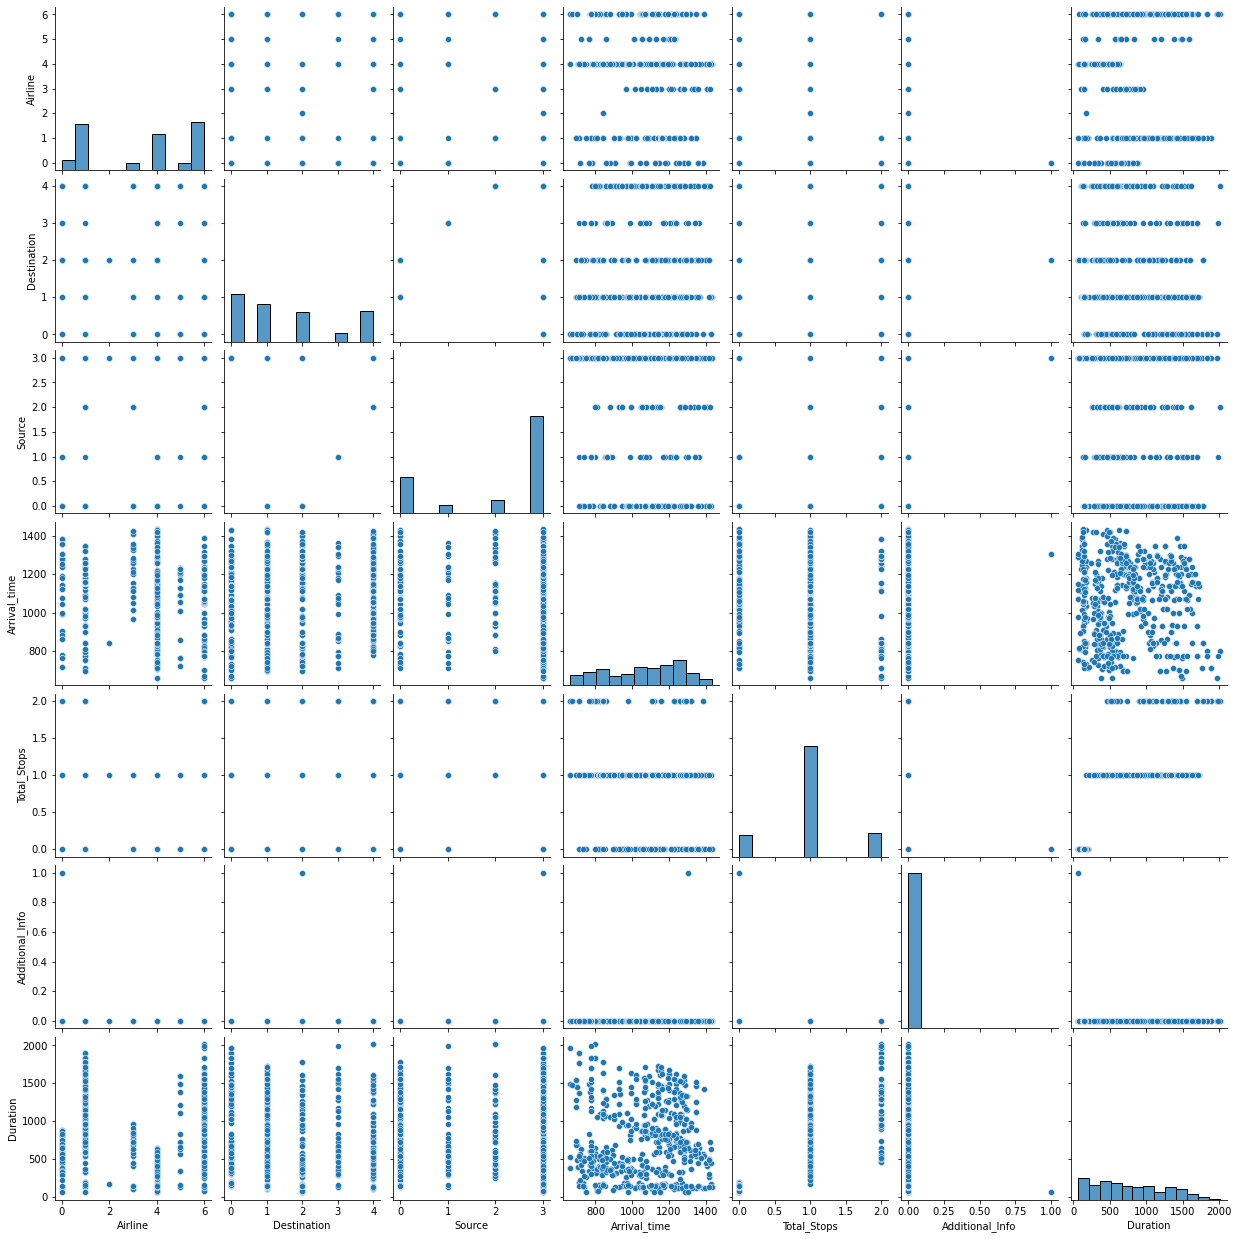

In [69]:
# Checking the pairwise relationship between columns.
plt.figure(figsize=(20,20))
sns.pairplot(df)
plt.show()

#### Checking the correlation

In [70]:
df.corr()

,Airline,Destination,Source,Arrival_time,Total_Stops,Additional_Info,Duration
Airline,1.000000,0.075735,0.076910,-0.150971,-0.047598,-0.070273,-0.108577
Destination,0.075735,1.000000,-0.215558,0.115483,-0.019454,0.012348,-0.112061
Source,0.076910,-0.215558,1.000000,-0.108462,-0.203773,0.031329,-0.131585
Arrival_time,-0.150971,0.115483,-0.108462,1.000000,-0.095898,0.052858,-0.002706
Total_Stops,-0.047598,-0.019454,-0.203773,-0.095898,1.000000,-0.083492,0.581747
Additional_Info,-0.070273,0.012348,0.031329,0.052858,-0.083492,1.000000,-0.065578
Duration,-0.108577,-0.112061,-0.131585,-0.002706,0.581747,-0.065578,1.000000


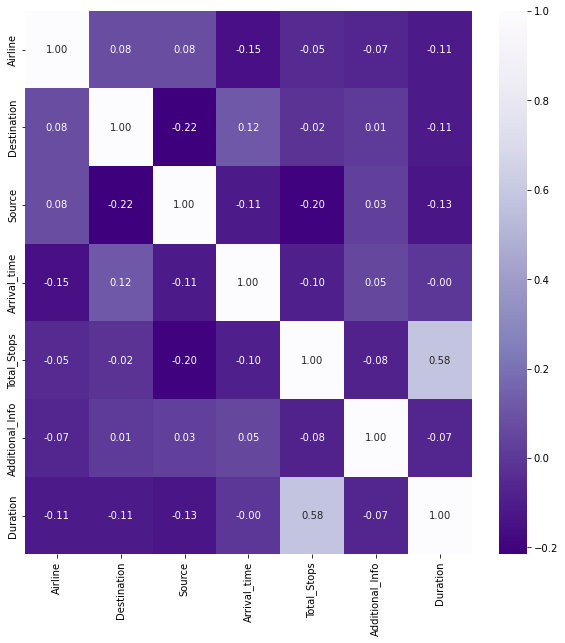

In [71]:
# Visualizing correlation using heatmap for better understanding.
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='Purples_r',fmt='0.2f')
plt.show()

In [83]:
df.corr()["Price"].sort_values()

Arrival_time      -0.174061
Additional_Info   -0.148451
Source             0.068355
Destination        0.077037
Duration           0.369619
Airline            0.379192
Total_Stops        0.436196
Price              1.000000
Name: Price, dtype: float64

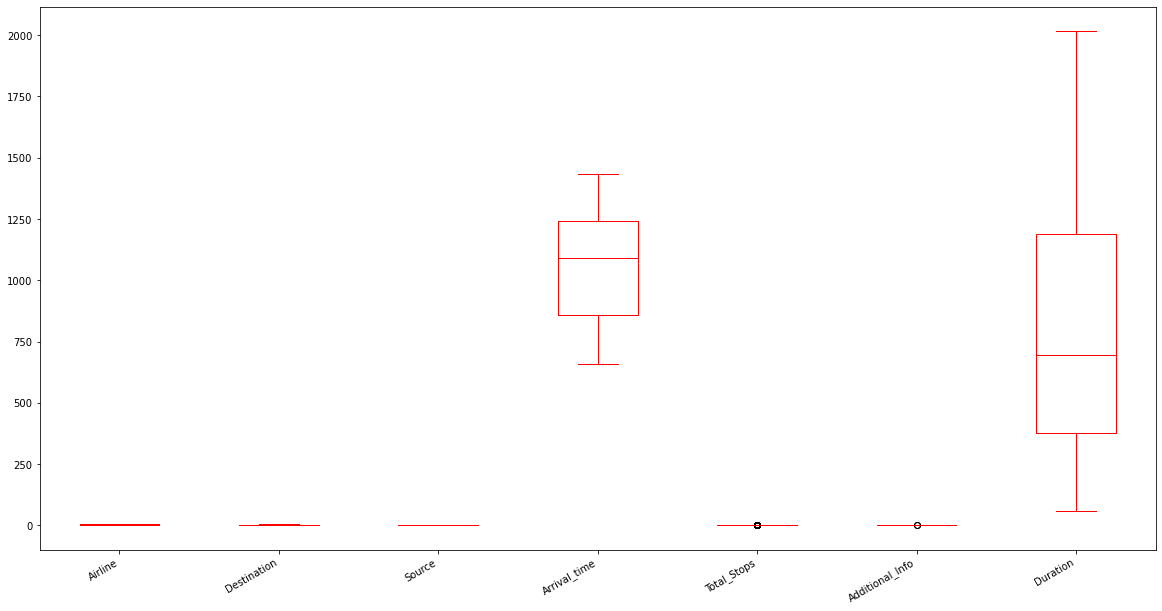

In [72]:
# Checking the outliers in dataset using boxplot.
df.plot(kind='box',fontsize=10,figsize=(20,10),color='red')
plt.xticks(rotation=30,ha='right')
plt.show()

In [73]:
## Checking Skewness
df.skew()

Airline            -0.182179
Destination         0.519859
Source             -0.889347
Arrival_time       -0.264040
Total_Stops         0.010972
Additional_Info    22.560963
Price               1.784946
Duration            0.390789
dtype: float64

In [74]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [75]:
# Separating the columns that needs skewness removal.
removal=['Destination','Additional_Info','Price','Duration']

In [76]:
# Skewness handling using PowerTransformation(yeo-johnson) method.

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [78]:
df[removal] = scaler.fit_transform(df[removal].values)
df[removal].head()

,Destination,Additional_Info,Price,Duration
0,-1.274,-0.044302,-1.458064,-0.337630
1,-1.274,-0.044302,-1.458064,-0.135397
2,-1.274,-0.044302,-1.458064,-0.008721
3,-1.274,-0.044302,-1.458064,0.228679
4,-1.274,-0.044302,-1.387025,-1.516257


In [79]:
df.skew()

Airline            -0.182179
Destination        -0.018783
Source             -0.889347
Arrival_time       -0.264040
Total_Stops         0.010972
Additional_Info    22.560963
Price              -0.008638
Duration           -0.133743
dtype: float64

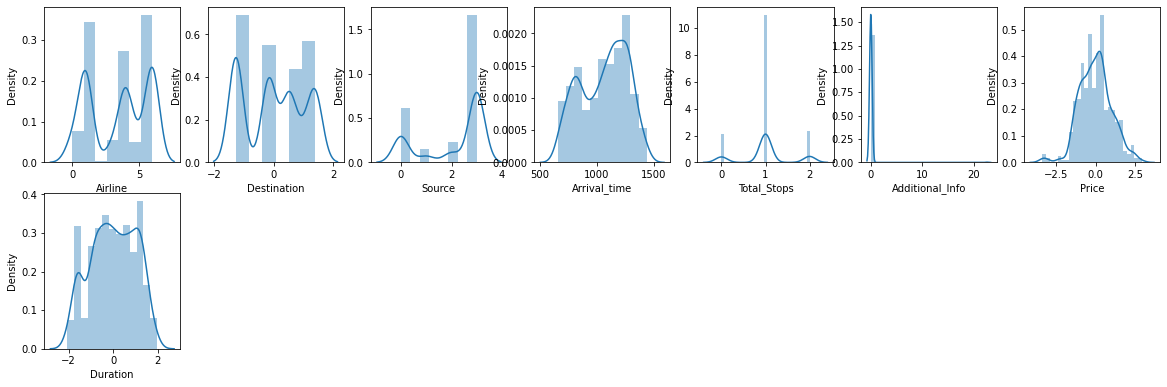

In [88]:
plt.figure(figsize=(20,20), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=42:
        ax = plt.subplot(6,7,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [80]:
df.columns

Index(['Airline', 'Destination', 'Source', 'Arrival_time', 'Total_Stops',
       'Additional_Info', 'Price', 'Duration'],
      dtype='object')

In [89]:
x=df.drop("Price",axis=1)
y=df["Price"]

In [90]:
x.columns

Index(['Airline', 'Destination', 'Source', 'Arrival_time', 'Total_Stops',
       'Additional_Info', 'Duration'],
      dtype='object')

In [91]:
x.head()

,Airline,Destination,Source,Arrival_time,Total_Stops,Additional_Info,Duration
0,3,-1.274,3,1350,1,-0.044302,-0.337630
1,3,-1.274,3,1260,1,-0.044302,-0.135397
2,3,-1.274,3,1200,1,-0.044302,-0.008721
3,3,-1.274,3,1080,1,-0.044302,0.228679
4,5,-1.274,3,1130,0,-0.044302,-1.516257


In [92]:
y.head()

0   -1.458064
1   -1.458064
2   -1.458064
3   -1.458064
4   -1.387025
Name: Price, dtype: float64

In [93]:
x.shape, y.shape

((1021, 7), (1021,))

In [94]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [95]:
x.head()

,Airline,Destination,Source,Arrival_time,Total_Stops,Additional_Info,Duration
0,-0.212571,-1.274,0.707166,1.414389,-0.023694,-0.044302,-0.337630
1,-0.212571,-1.274,0.707166,0.971853,-0.023694,-0.044302,-0.135397
2,-0.212571,-1.274,0.707166,0.676830,-0.023694,-0.044302,-0.008721
3,-0.212571,-1.274,0.707166,0.086783,-0.023694,-0.044302,0.228679
4,0.703188,-1.274,0.707166,0.332636,-1.884597,-0.044302,-1.516257


In [96]:
## Checking for Multicolinearity
## VIF (Variance Inflation factor)
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.052042,Airline
1,1.169688,Destination
2,1.202982,Source
3,1.074623,Arrival_time
4,1.808012,Total_Stops
5,1.018367,Additional_Info
6,1.788890,Duration


In [97]:
var_threshold = VarianceThreshold(threshold=0)
var_threshold.fit(x)

VarianceThreshold(threshold=0)

In [98]:
var_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True])

In [99]:
x.columns[var_threshold.get_support()]

Index(['Airline', 'Destination', 'Source', 'Arrival_time', 'Total_Stops',
       'Additional_Info', 'Duration'],
      dtype='object')

In [100]:
# taking  out  all the  constant  columns 
cons_columns = [column for column in x.columns
               if column not in x.columns[var_threshold.get_support()]]
print(len(cons_columns))

0


In [101]:
bestfeat = SelectKBest(score_func = f_classif, k = 'all')
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [102]:
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(40,'Score'))

           Feature      Score
5  Additional_Info        inf
2           Source  40.497374
0          Airline  39.112615
4      Total_Stops  30.375466
1      Destination  30.114308
6         Duration  22.307478
3     Arrival_time   8.486328


In [108]:
# Creating Model
# Finding the best random state among all the models
# On the basis of target column, we will understand this by Regression Problem

maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .25, random_state = i)
    modDTR =  DecisionTreeRegressor()
    modDTR.fit(x_train,y_train)
    pred = modDTR.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.9365335720787531 on random_state: 42


In [109]:
# Creating train-test-split
# creating new train test split using the random state.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .20, random_state = maxRS)

In [110]:
# Regression Algorithms
# 1. Linear Regression
# Checking r2score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)

# prediction
predLR=LR.predict(x_test)
print('R2_score:',r2_score(y_test,predLR))
print('Mean abs error:',mean_absolute_error(y_test, predLR))
print('Mean squared error:',mean_squared_error(y_test, predLR))

R2_score: 0.4050533855685233
Mean abs error: 0.6850621718163857
Mean squared error: 0.7535538863347517


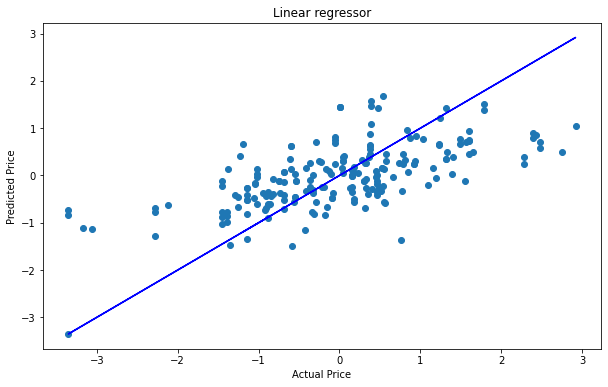

In [111]:
# Checking the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=predLR,cmap='set1')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear regressor")
plt.show()

In [112]:
#    2. Random Forest Regression Model
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor(n_estimators=600, random_state=maxRS)
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,predRFR))
print('Mean abs error:',mean_absolute_error(y_test, predRFR))
print('Mean squared error:',mean_squared_error(y_test, predRFR))

R2_Score: 0.92630093368758
Mean abs error: 0.20348043139122207
Mean squared error: 0.0933465566352307


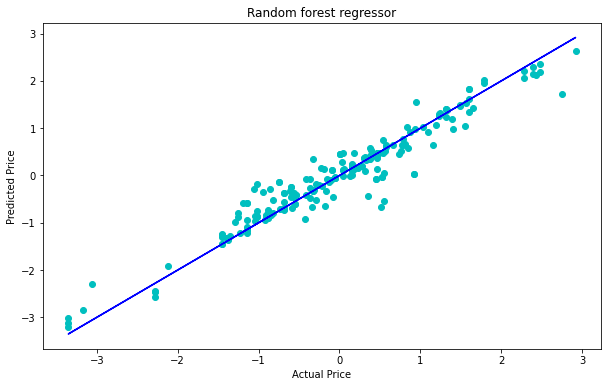

In [113]:
# Checking the performance of the model by graph
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=predRFR,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Random forest regressor")
plt.show()

In [114]:
#3. KNN Regressor
# Checking R2 score for KNN regressor
knn=KNeighborsRegressor(n_neighbors=9 )
knn.fit(x_train,y_train)

#prediction
predknn=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,predknn))
print('Mean abs error:',mean_absolute_error(y_test, predknn))
print('Mean squared error:',mean_squared_error(y_test, predknn))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,predknn)))

R2_Score: 0.6268798062584195
Mean abs error: 0.4969002709306224
Mean squared error: 0.4725905908929698
Root Mean Squared Error:  0.6874522462636731


Text(0.5, 1.0, 'K-nearest neighbors  regressor')

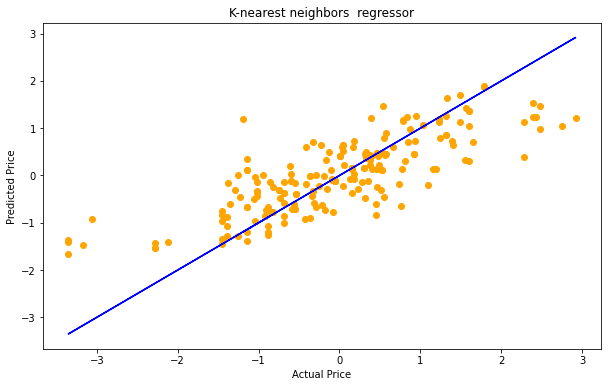

In [115]:
# Checking the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=predknn,color='orange')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("K-nearest neighbors  regressor")

In [116]:
# 4. Gradient boosting Regressor
# Checking R2 score for GBR
Gb= GradientBoostingRegressor(n_estimators=400,  random_state=maxRS, learning_rate=0.1, max_depth=3)
Gb.fit(x_train,y_train)

#prediction
predGb=Gb.predict(x_test)
print('R2_Score:',r2_score(y_test,predGb))
print('Mean abs error:',mean_absolute_error(y_test, predGb))
print('Mean squared error:',mean_squared_error(y_test, predGb))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,predGb)))

R2_Score: 0.8818689207726795
Mean abs error: 0.27196294617983713
Mean squared error: 0.14962373377606392
Root Mean Squared Error:  0.38681227200809426


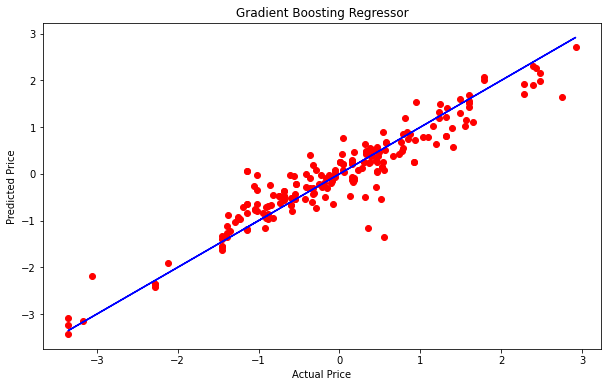

In [117]:
# Checking the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=predGb,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Gradient Boosting Regressor")
plt.show()

In [118]:
# 5. Decision Tree Regressor
# Checking R2 score for GBR
DTR= DecisionTreeRegressor()
DTR.fit(x_train,y_train)

#prediction
predDTR=DTR.predict(x_test)
print('R2_Score:',r2_score(y_test,predDTR))
print('Mean abs error:',mean_absolute_error(y_test, predDTR))
print('Mean squared error:',mean_squared_error(y_test, predDTR))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,predDTR)))

R2_Score: 0.9402334308437986
Mean abs error: 0.09897047009600629
Mean squared error: 0.07569978443122559
Root Mean Squared Error:  0.2751359380946546


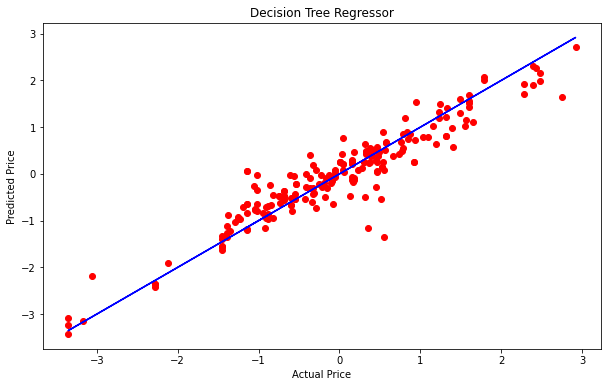

In [119]:
# Checking the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=predGb,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Decision Tree Regressor")
plt.show()

In [121]:
# Cross Validation Score for all the model
#CV Score for Linear Regression
print('CV score for Linear Regression: ',cross_val_score(LR,x,y,cv=5).mean())

#CV Score for Random Forest Regression
print('CV score for Random forest Regression: ',cross_val_score(RFR,x,y,cv=5).mean())

#CV Score for KNN Regression
print('CV score for KNN Regression: ',cross_val_score(knn,x,y,cv=5).mean())

#CV Score for Gradient Boosting Regression
print('CV score for Gradient Boosting Regression: ',cross_val_score(Gb,x,y,cv=5).mean())

#CV Score for Decision Tree Regression
print('CV score for Decision Tree Regression: ',cross_val_score(DTR,x,y,cv=5).mean())

CV score for Linear Regression:  0.171834528923219
CV score for Random forest Regression:  0.6879427427549685
CV score for KNN Regression:  0.3926167677290153
CV score for Gradient Boosting Regression:  0.7122972864960863
CV score for Decision Tree Regression:  0.6570076922902144


In [122]:
# Hyper Parameter Tuning
# The Gradient boosting regressor with GridsearchCV
parameter = {'n_estimators':[100,200,300,400],
             'learning_rate':[0.1,0.01,0.001,1],
             'subsample': [0.1,0.2,0.3,0.5,1],
             'max_depth':[1,2,3,4],
             'alpha':[0.1,0.01,0.001,1]}

In [123]:
CV_GBR = GridSearchCV(GradientBoostingRegressor(),parameter,cv=6,n_jobs = 3,verbose = 2)

In [124]:
CV_GBR.fit(x_train,y_train)

Fitting 6 folds for each of 1280 candidates, totalling 7680 fits


GridSearchCV(cv=6, estimator=GradientBoostingRegressor(), n_jobs=3,
             param_grid={'alpha': [0.1, 0.01, 0.001, 1],
                         'learning_rate': [0.1, 0.01, 0.001, 1],
                         'max_depth': [1, 2, 3, 4],
                         'n_estimators': [100, 200, 300, 400],
                         'subsample': [0.1, 0.2, 0.3, 0.5, 1]},
             verbose=2)

In [125]:
CV_GBR.best_params_

{'alpha': 0.1,
 'learning_rate': 0.1,
 'max_depth': 4,
 'n_estimators': 400,
 'subsample': 1}

In [126]:
# Creating Regressor Model with Gradient Boosting Regressor
GBR = GradientBoostingRegressor(n_estimators=400, alpha=0.001,learning_rate= 0.1, max_depth= 4, subsample = 0.5)
GBR.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.001, max_depth=4, n_estimators=400,
                          subsample=0.5)

In [127]:
#prediction
GBRpred = GBR.predict(x_test)
#R2 score
acc = r2_score(y_test,GBRpred)
print(acc*100)

93.21015174289789


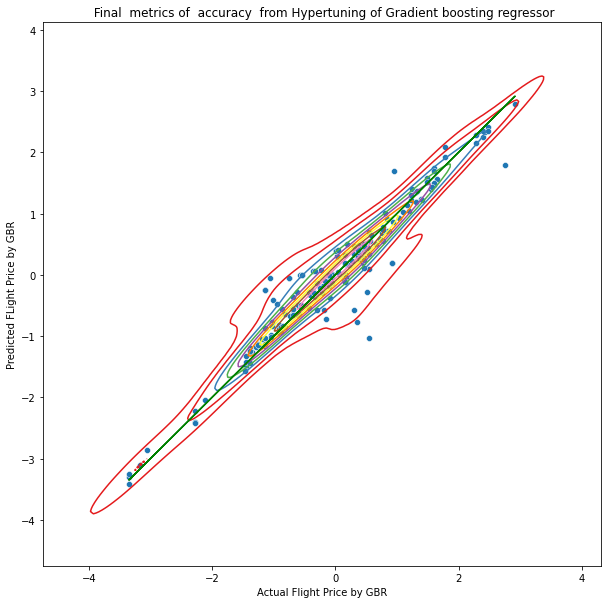

In [128]:
#Verifying the final  performance of the model by graph
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_test,y=GBRpred,palette='Set2')
sns.kdeplot(x=y_test,y=GBRpred, cmap='Set1')
plt.plot(y_test,y_test,color='g')
#Verifying the performance of the model by graph
plt.xlabel("Actual Flight Price by GBR")
plt.ylabel("Predicted FLight Price by GBR")
plt.title(" Final  metrics of  accuracy  from Hypertuning of Gradient boosting regressor")
plt.show()

In [129]:
# The Random Forest regressor with GridsearchCV
parameter = {'n_estimators':[30,60,80],'max_depth': [10,20,40],
             'min_samples_leaf':[5,10,20],'min_samples_split':[5,10],
             'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}

In [130]:
GCV = GridSearchCV(RandomForestRegressor(),parameter,cv=5,n_jobs = -1,verbose = 1)

In [131]:
GCV.fit(x_train,y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [10, 20, 40],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [5, 10],
                         'n_estimators': [30, 60, 80]},
             verbose=1)

In [132]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 80}

In [133]:
# Creating Regressor Model with Random Forest Regressor
RFR = RandomForestRegressor(random_state=50, max_features='auto', n_estimators= 200, max_depth=6, criterion='mse')
RFR.fit(x_train, y_train)

RandomForestRegressor(criterion='mse', max_depth=6, max_features='auto',
                      n_estimators=200, random_state=50)

In [134]:
#prediction
RFRpred = RFR.predict(x_test)
#R2 score
acc = r2_score(y_test,RFRpred)
print(acc*100)

77.91735915179676


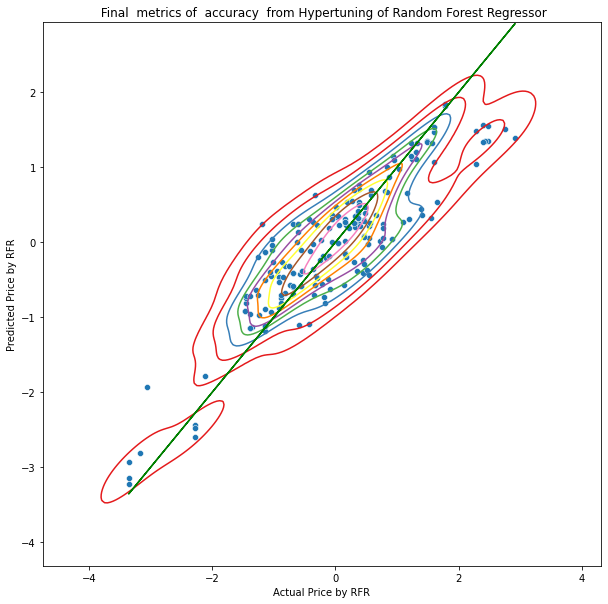

In [135]:
# So after the Hypertuning now we have got a descent accuracy score of 91% on Random Forest Regressor
#Verifying the final  performance of the model by graph
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_test,y=RFRpred,palette='Set2')
sns.kdeplot(x=y_test,y=RFRpred, cmap='Set1')
plt.plot(y_test,y_test,color='g')
#Verifying the performance of the model by graph
plt.xlabel("Actual Price by RFR")
plt.ylabel("Predicted Price by RFR")
plt.title(" Final  metrics of  accuracy  from Hypertuning of Random Forest Regressor")
plt.show()

#### After checking both model it is concluded that Gradient Boosting Regressor is giving best R2 Score. So, we will save and predict on GBR.



## Saving The Predictive Model

In [136]:
#saving the model at local file system
filename='flight_price_prediction.pickle'
pickle.dump(CV_GBR,open(filename,'wb'))
#prediction using the saved model
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.predict(x_test)

array([-1.06147188,  2.39791683,  0.20428265, -0.62392194, -0.90541459,
        1.43042309, -0.60314602, -1.41689115,  0.37066422,  0.76803681,
        0.32338702,  0.30039942,  0.34993744,  1.27858629, -0.53388897,
        2.01902985,  0.06620839, -1.03831862,  2.13525205, -1.11096227,
        0.95454948, -0.07524828,  0.53215731, -3.33342855, -0.85714379,
        0.06042425,  0.42889061, -1.03773309, -0.19169039,  0.29441625,
        0.30039942,  0.07168268,  1.03939825, -1.48953515,  0.42475595,
       -0.92169611, -1.11694657,  1.55919068,  0.36231184,  0.87720786,
        0.2884958 ,  0.05043907, -0.72117836, -3.1849712 ,  0.63827988,
       -0.08856059, -0.39075679,  0.3962507 ,  2.25534115,  2.33198094,
        2.33367997, -0.39075679, -0.02607099, -0.23346942,  0.06620839,
       -1.30613767,  0.06580647,  0.84824538,  0.25676481,  0.52527705,
       -2.78129605,  0.17503552, -0.10244572, -0.38828555, -0.72635638,
       -0.52608175,  0.24437362, -2.31780643, -0.1031506 , -0.69

In [137]:
# Checking predicted and original values
a = np.array(y_test)
predict = np.array(loaded_model.predict(x_test))
flight_price_prediction = pd.DataFrame({"Original":a,"Predicted":predict},index= range(len(a)))
flight_price_prediction

,Original,Predicted
0,-1.195279,-1.061472
1,2.481778,2.397917
2,-1.144577,0.204283
3,-0.602648,-0.623922
4,-0.889114,-0.905415
...,...,...
200,-0.581785,-0.674615
201,-0.247255,-0.228064
202,1.565015,1.295866
203,1.230412,1.287195


Text(0.5, 1.0, 'Original vs predicted  graph')

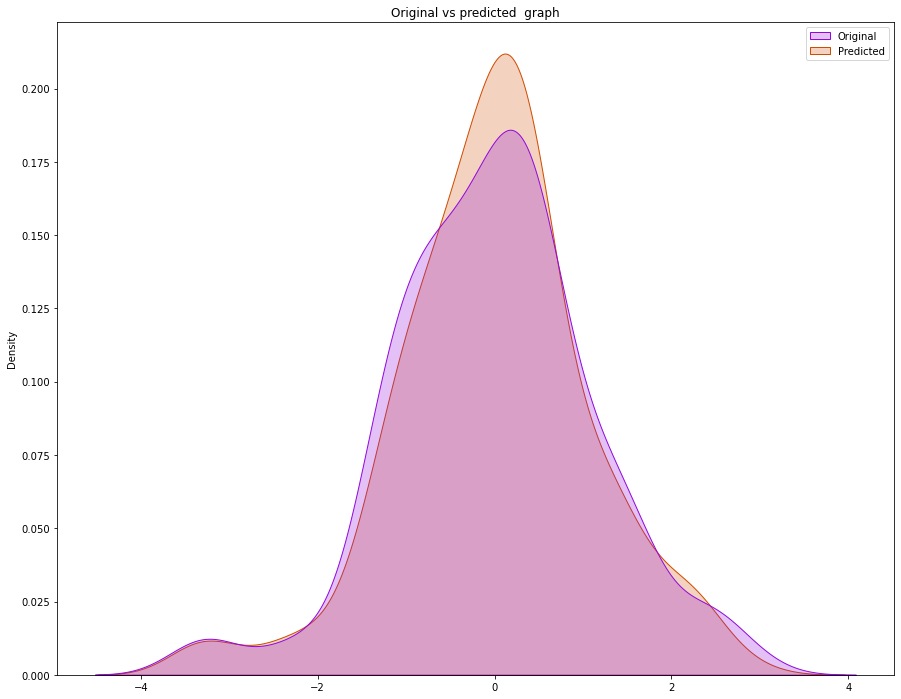

In [138]:
# Let's plot and visualize
plt.figure(figsize=(15,12))
sns.kdeplot(data=flight_price_prediction, palette='gnuplot',gridsize=900, shade=True)
plt.title('Original vs predicted  graph')

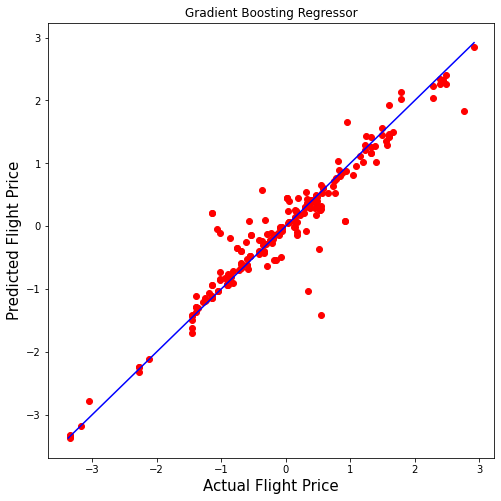

In [139]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,predict,c='r')
plt1 = max(max(predict),max(y_test))
plt2 = min(min(predict),min(y_test))
plt.plot([plt1,plt2],[plt1,plt2],'b-')
plt.xlabel('Actual Flight Price',fontsize=15)
plt.ylabel('Predicted Flight Price',fontsize=15)
plt.title("Gradient Boosting Regressor")
plt.show()

In [140]:
# Saving the model in CSV format
model =flight_price_prediction.to_csv('flight_price_prediction.csv')
model